In [1]:
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"
# Import netket library
import netket as nk
# Helper libraries
import numpy as np  
import matplotlib.pyplot as plt
from netket.operator.spin import sigmax, sigmay, sigmaz

In [2]:
L = 16

# 1-d hypercube with periodic boundary 
lattice = nk.graph.Hypercube(length=L, n_dim=1, pbc=True)

# Define the Hilbert space: spin half, total magnetization 0, same size as g)
hilbert = nk.hilbert.Spin(s=1/2, N=lattice.n_nodes, inverted_ordering=False)

# Get Heisenberg Hamiltonian
# There is a factor of 2 between Pauli-matrices and spin-1/2 operators (thus a factor of 4 in H)
hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=lattice,sign_rule=False, J=1)

# Compute both eigenvalues and eigenvectors
evals, evecs = nk.exact.lanczos_ed(hamiltonian, compute_eigenvectors=True)

# 输出基态能量
print('The exact ground-state energy is E0 = ', evals[0] / (4 * L))  #基态能量除以四是因为netket里用的泡利矩，缺少1/2常数，两个相互作用就是1/4

# 获取基态波函数
ground_state = evecs[:, 0]

The exact ground-state energy is E0 =  -0.4463935225385488


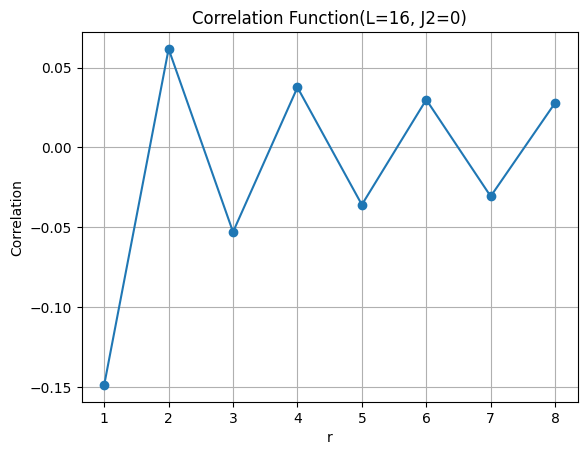

In [3]:
def correlation_function(L, r, op_constructor, hilbert, wavefunction):
    corr_op = nk.operator.LocalOperator(hilbert, 0.0)
    for i in range(L):
        j = (i + r) % L
        corr_op += op_constructor(hilbert, i) * op_constructor(hilbert, j)
    mat = corr_op.to_dense()
    return 0.25*(wavefunction.conjugate().T @ (mat @ wavefunction)) / L

# x_vals = range(1, L)
x_vals = range(1, (L // 2) + 1)

corr_vals = []
for r in x_vals:
    corr_x = correlation_function(L, r, sigmax, hilbert, ground_state)
    corr_vals.append(np.real(corr_x))

plt.plot(x_vals, corr_vals, marker='o')
plt.xlabel('r')
plt.ylabel('Correlation')
plt.title(f'Correlation Function(L={L}, J2=0)')
plt.grid(True)
plt.show()